In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import rfpimp
from yellowbrick.classifier import ROCAUC

from utils import get_project_root
import utils
from data_statistical_features import Segment
from ml_statistical_features import load_data_as_dataframe
from eda_utils import get_correlated_columns

plt.rcParams.update(utils.get_plt_settings())

save=True

/Users/zianor/.virtualenvs/venv/Bachelorarbeit/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


# Load Data

In [2]:
df = load_data_as_dataframe(segment_length=10, overlap_amount=0, hr_threshold=10)

df.rename(columns={'number_zero_crossings': 'number zero crossings', 'mean_signal_envelope' : 'mean signal envelope',
                  'variance_local_minima' : 'variance local minima', 'variance_local_maxima' : 'variance local maxima', 
                  'mean_signal_envelope': 'mean signal envelope'}, inplace=True)

features = df.drop(['brueser_sqi', 'patient_id', 'informative', 'ecg_hr', 'bcg_hr', 'abs_err', 'rel_err', 'quality_class', 'error'], axis='columns')
target = df['informative']
error = df['error']
bcg_hr = df['bcg_hr']
ecg_hr = df['ecg_hr']
patient_id = df['patient_id']

In [5]:
df['mean'].max()

35.09605637599181

In [4]:
from ml_statistical_features import get_patient_split
x_train, x_test, y_train, y_test, groups_train, groups_test = get_patient_split(features, target, patient_id, test_size=0.33)

# Correlation Heatmap

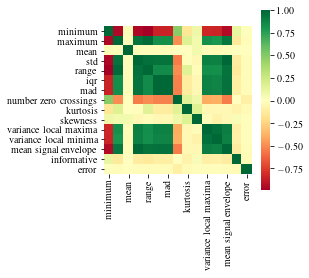

In [4]:
width, _ = utils.get_plt_normal_size()

plt.figure(figsize=(width*0.8, width*0.8))

cols = ['minimum', 'maximum', 'mean', 'std', 'range', 'iqr', 'mad','number zero crossings', 'kurtosis', 'skewness',
        'variance local maxima', 'variance local minima', 'mean signal envelope', 'informative', 'error']
sns.heatmap(df.loc[x_train.index, cols].corr(), square=True, cmap ="RdYlGn")
if save:
    plt.savefig(os.path.join(utils.get_thesis_pic_path(),'corr-heatmap-statistical.pdf'), bbox_inches='tight', transparent=True, dpi=300)

# Paarweise geplottet

<Figure size 425.205x262.797 with 0 Axes>

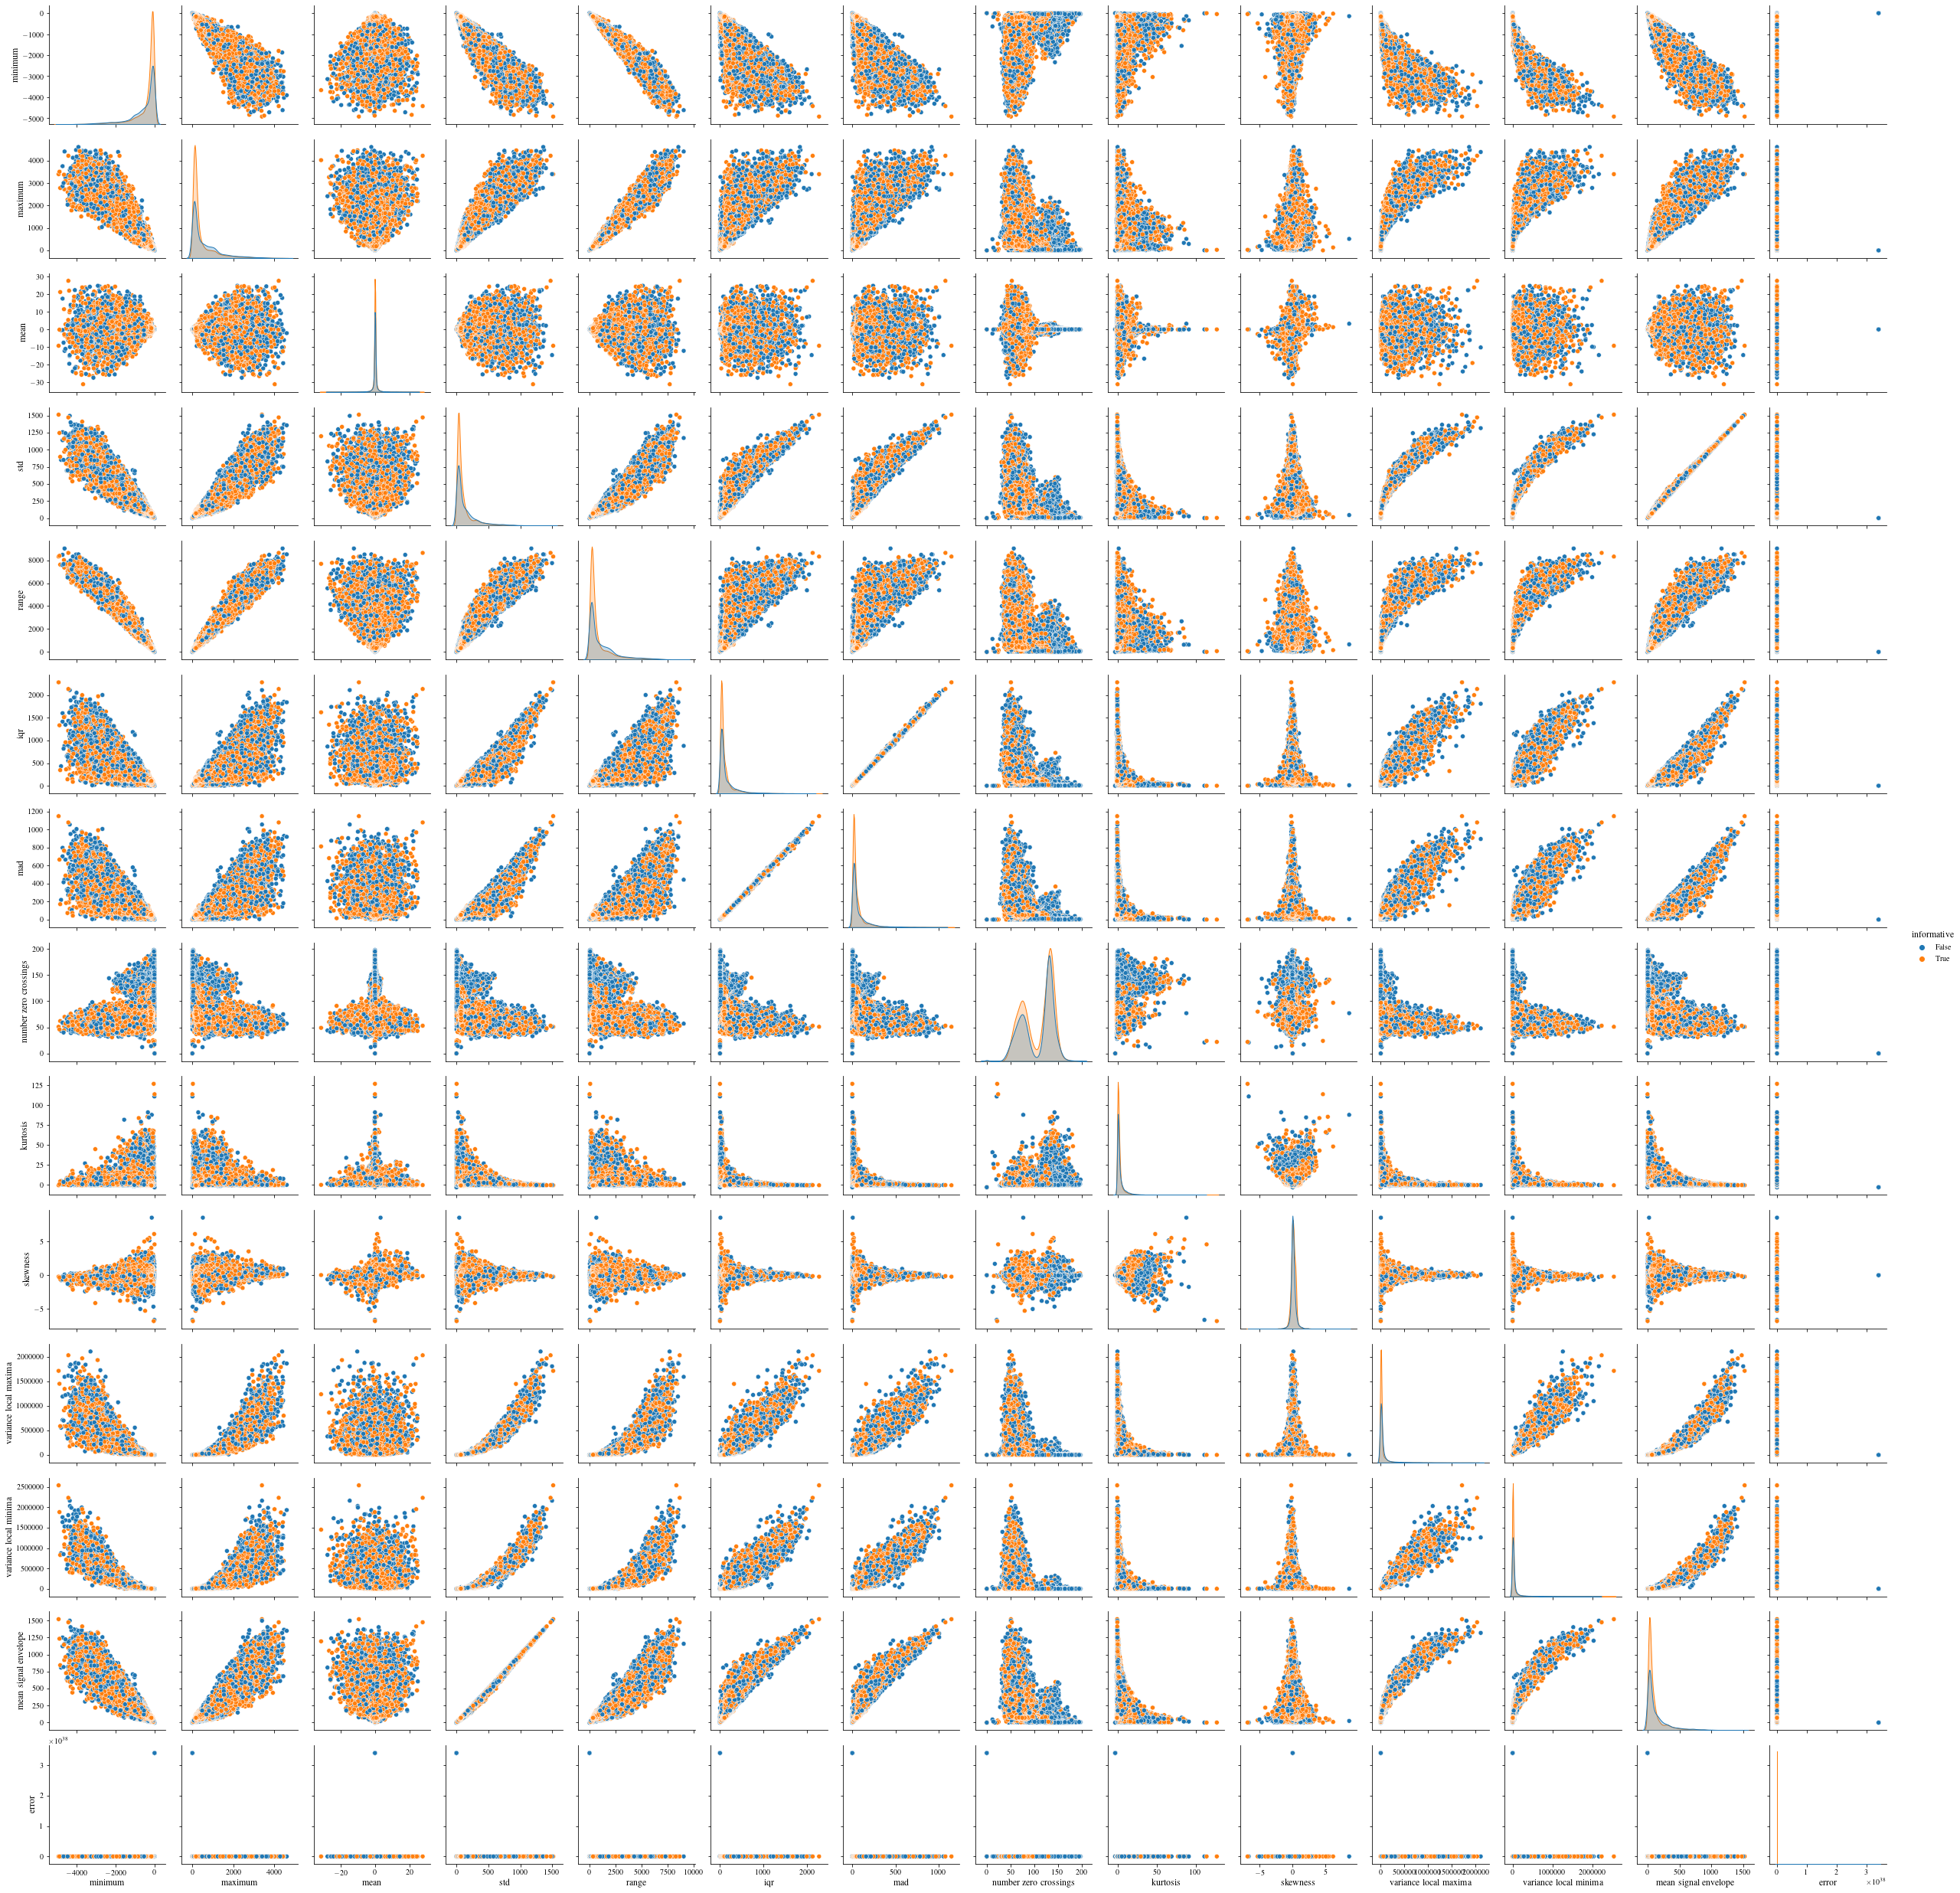

In [6]:
plt.figure(figsize=utils.get_plt_big_size())
cols = ['minimum', 'maximum', 'mean', 'std', 'range', 'iqr', 'mad','number zero crossings', 'kurtosis', 'skewness',
        'variance local maxima', 'variance local minima', 'mean signal envelope', 'informative', 'error']

sns.pairplot(df.loc[x_train.index, cols], kind='scatter', hue='informative', dropna=True)

if save:
    plt.savefig(os.path.join(utils.get_thesis_pic_path(),'pairplot-statistical-all.pdf'), bbox_inches='tight', transparent=True, dpi=300)

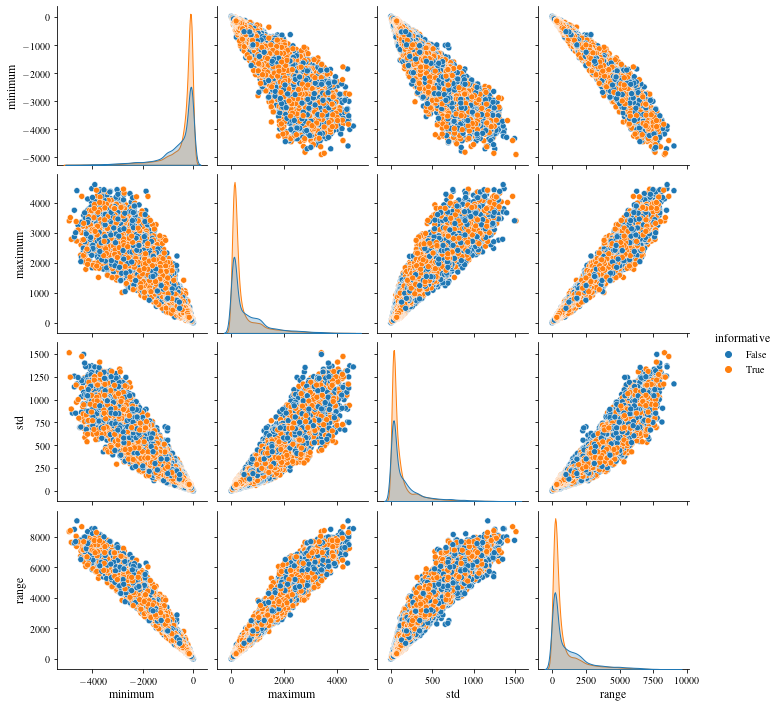

In [7]:
cols = ['minimum', 'maximum', 'std', 'range', 'informative']
sns.pairplot(df.loc[x_train.index, cols], kind='scatter', hue='informative')

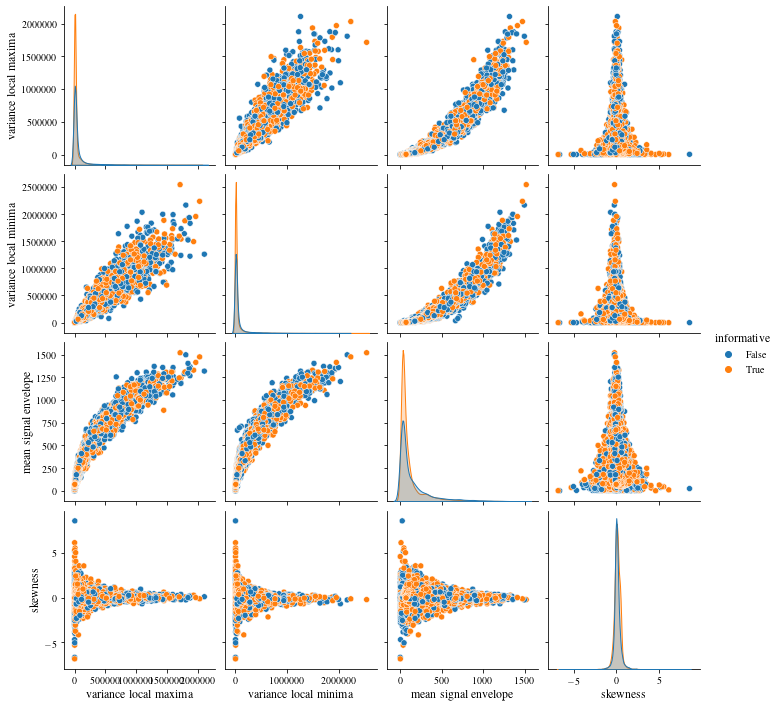

In [12]:
cols = ['variance local maxima', 'variance local minima', 'mean signal envelope', 'skewness', 'informative']
sns.pairplot(df.loc[x_train.index, cols], kind='scatter', hue='informative')

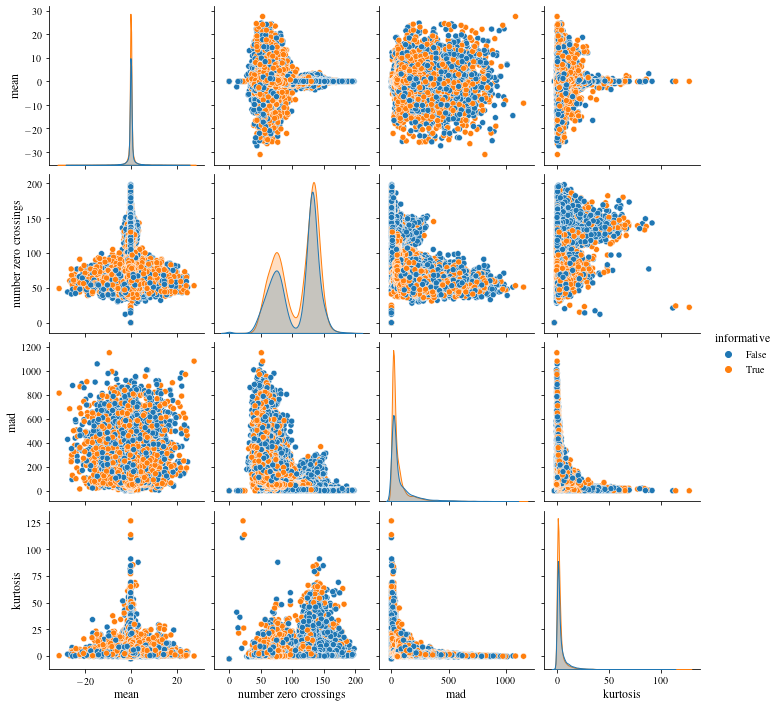

In [13]:
cols = ['mean', 'number zero crossings', 'mad', 'kurtosis', 'informative']
sns.pairplot(df.loc[x_train.index, cols], kind='scatter', hue='informative')

# Fazit
- stark korrelierende Merkmale
- Dimensionsreduktion zur Reduzierung von stark korrelierenden Merkmalen sinnvoll
- keine klare Verteilung von informativ und nicht informativ, große Überlappung

# Einfluss der Merkmale bei Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

import estimators

In [15]:
rf = estimators.MLStatisticalEstimator('RF_hr10')



/Users/zianor/.virtualenvs/venv/Bachelorarbeit/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.22.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/zianor/.virtualenvs/venv/Bachelorarbeit/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 0.22.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/zianor/.virtualenvs/venv/Bachelorarbeit/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator Pipeline from version 0.23.2 when using version 0.22.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/zianor/.virtualenvs/venv/Bachelorarbeit/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to u

In [16]:
rf.model['clf'].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

 1) skewness                       0.098455
 2) number zero crossings          0.094865
 3) maximum                        0.083978
 4) range                          0.082158
 5) variance local maxima          0.081258
 6) minimum                        0.079424
 7) kurtosis                       0.075335
 8) iqr                            0.072477
 9) mad                            0.071523
10) mean signal envelope           0.071364
11) variance local minima          0.071128
12) std                            0.067525
13) mean                           0.050511


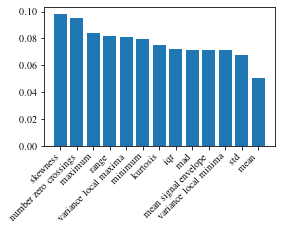

In [17]:
importances = rf.model['clf'].feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, features.columns[indices[f]], importances[indices[f]]))
plt.figure(figsize=utils.get_plt_normal_size())
plt.bar(range(x_train.shape[1]), importances[indices], align='center')
plt.xticks(range(x_train.shape[1]), [name.replace("_", " ") for name in features.columns[indices]], rotation=45, ha="right")
plt.xlim([-1, x_train.shape[1]])
if save:
    plt.savefig(os.path.join(utils.get_thesis_pic_path(),'rf-cl-statistical.pdf'), bbox_inches='tight', transparent=True, dpi=300)

In [18]:
y_train_regr = error.loc[y_train.index]
y_test_regr = error.loc[y_test.index]

In [19]:
forest_regr = RandomForestRegressor(random_state=1)

forest_regr.fit(x_train, y_train_regr)
forest_regr.score(x_test, y_test_regr)

0.3859812598561316

2.1566991951372832e+38
MSE: 5.880765670723094e+73
MAE: 3.1782061496665653e+35
                 precision    recall  f1-score   support

non-informative       0.55      1.00      0.71     14030
    informative       0.00      0.00      0.00     11338

       accuracy                           0.55     25368
      macro avg       0.28      0.50      0.36     25368
   weighted avg       0.31      0.55      0.39     25368



/Users/zianor/.virtualenvs/venv/Bachelorarbeit/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


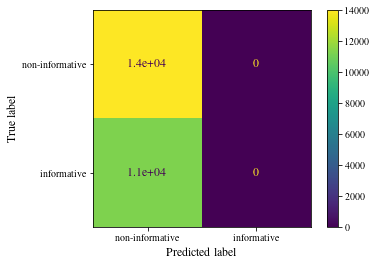

In [20]:
y_pred = forest_regr.predict(x_test)
y_true = y_test_regr

print(np.max(y_pred))

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, mean_squared_error, mean_absolute_error

print("MSE: " + str(mean_squared_error(y_true, y_pred)))
print("MAE: " + str(mean_absolute_error(y_true, y_pred)))

y_pred_label = [err < 10 for err in y_pred]
y_true_label = [err < 10 for err in y_true]

class_names = ['non-informative', 'informative']
ConfusionMatrixDisplay(confusion_matrix(y_true_label, y_pred_label), display_labels=class_names).plot()
print(classification_report(y_true_label, y_pred_label, target_names=class_names))

In [3]:
from sklearn.decomposition import KernelPCA, PCA
from sklearn.preprocessing import StandardScaler

In [7]:
std_scaler = StandardScaler()

x_std = std_scaler.fit_transform(x_test)

In [8]:
pca = PCA(n_components=2)
x_transform = pca.fit_transform(x_std)
df_linear = pd.DataFrame(x_transform)
df_linear['informative'] = y_test.values

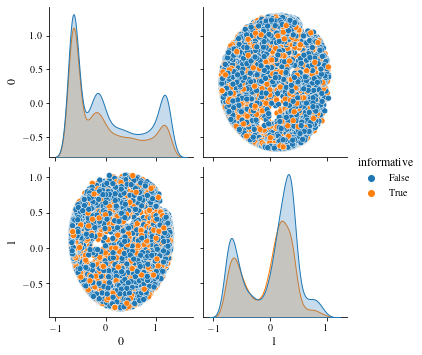

In [27]:
pca_cosine = KernelPCA(n_components=2, kernel='cosine')
x_transform = pca_cosine.fit_transform(x_std)
df_cosine = pd.DataFrame(x_transform)
df_cosine['informative'] = y_test.values

sns.pairplot(df_cosine, kind='scatter', hue='informative')

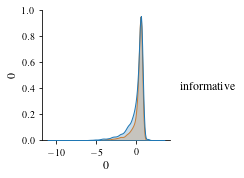

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis(n_components=1)
clf.fit(x_std, y_test)
x_lda = clf.transform(x_std)
df_lda = pd.DataFrame(x_lda)
df_lda['informative'] = y_test.values

sns.pairplot(df_lda, kind='scatter', hue='informative')

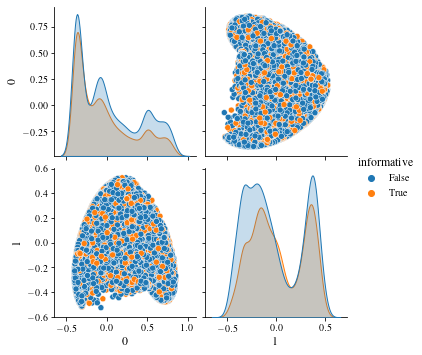

In [29]:
pca_rbf = KernelPCA(n_components=2, kernel='rbf', degree=3)
x_transform = pca_rbf.fit_transform(x_std)

df_rbf = pd.DataFrame(x_transform)
df_rbf['informative'] = y_test.values

sns.pairplot(df_rbf, kind='scatter', hue='informative')

In [30]:
# sns.reset_defaults()
sns.set_context("paper", font_scale=1.5) 
#sns.pairplot(df_rbf, kind='scatter', hue='informative')

<Figure size 148.822x148.822 with 0 Axes>

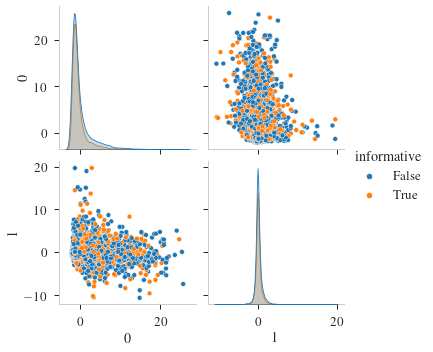

In [10]:
plt.rcParams['axes.grid'] = False
sns.set_context("paper", font_scale=1.5) 
width, _ = utils.get_plt_normal_size()
plt.figure(figsize=(width/2, width/2))

sns.pairplot(df_linear.sample(15000), hue='informative', palette="tab10")
if save:
   plt.savefig(os.path.join(utils.get_thesis_pic_path(),'statistical-pca-lin.pdf'), bbox_inches='tight', transparent=True, dpi=300)

<Figure size 148.822x148.822 with 0 Axes>

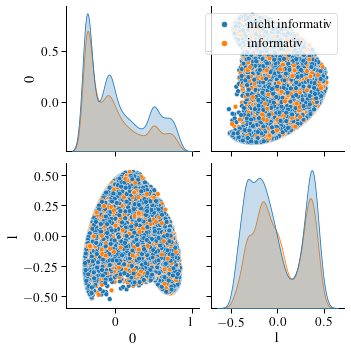

In [32]:
plt.figure(figsize=(width/2, width/2))
s = sns.pairplot(df_rbf, kind='scatter', hue='informative')
s._legend.remove()
handles = s._legend_data.values()
plt.legend(handles=handles, labels=['nicht informativ', 'informativ'], loc='upper right')
# plt.legend(loc='upper right')
if save:
    plt.savefig(os.path.join(utils.get_thesis_pic_path(),'statistical-pca-rbf.pdf'), bbox_inches='tight', transparent=True, dpi=300)